#### 공부시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴으로 점수 예측
- 데이터셋 : 임의의 생성
- 피쳐/속성 : 공부시간, 과외횟수
- 타겟 : 점수
- 학습방법 : 지도학습 > 회귀
- 학습알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형분포여야함!

[1] 데이터 준비

In [90]:
# # 14개의 데이터셋
# jumsu = range(7,100,7)
# len(jumsu), jumsu[-1]

# hour=range(1,29,2)
# len(hour)
import pandas as pd
import matplotlib.pyplot as plt


In [91]:
## 임의의 데이터
hour = [1,3,4,5,7,9,10]
jumsu = [32,55,83,70,99,92,100]
lesson = [0,0,1,2,0,1,2]

In [92]:

# 학습용 데이터 셋 구성 => 피쳐와 타겟
dataDF=pd.DataFrame({'Hour':hour,'lesson':lesson})
jumsuDF=pd.Series(jumsu)

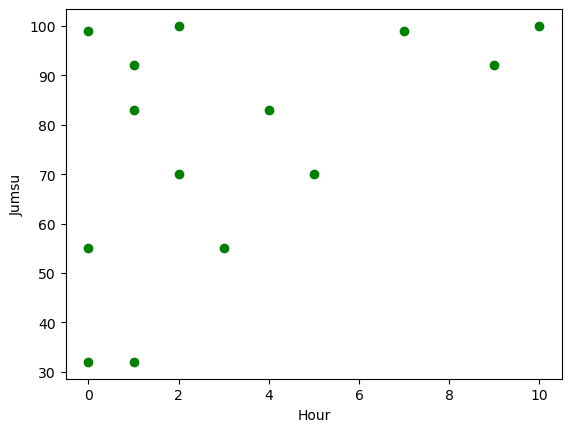

In [93]:
### 현재 데이터의 분포 확인
plt.plot(dataDF,jumsuDF,'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [94]:
# 모듈 로닝
from sklearn.linear_model import LinearRegression

In [95]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [96]:
# 학습 진행 => 쵀대한 많은 데이터를 직선의 기울기와 절편 찾기
model.fit(dataDF,jumsuDF)

LinearRegression()

In [97]:
# 학습 후 모델 파라미터
print(f'model.coef_ : {len(model.coef_)}개, {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

model.coef_ : 2개, [ 7.21508197 -1.89442623]
model.intercept_ : 37.28262295081968


[3] 모델 성능 평가

In [98]:
### 오차 계산 즉, 손실 / 비용 함수 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
#                           (                 오차                 ) (결정계수)
#  root_mean_squared_error => version 1.4 이상

In [99]:
# 점수 => 내부에서 predict() 진행 => 결과로 R2 계수 추출해서 반환
score = model.score(dataDF,jumsuDF)
print(f'scrore : {score}')

scrore : 0.8037389301379599


In [100]:
# 성능지표 => 2가지 오차 계산과 결정계수 계산
pre_y = model.predict(dataDF)

# 손실 / 비용 계싼 함수 => 정답과 예측값 : 0에 가까울 수록 좋음.
mse = mean_squared_error(jumsuDF,pre_y)
rmse = mean_squared_error(jumsuDF,pre_y,squared=False)
mae = mean_absolute_error(jumsuDF,pre_y)

# 얼머나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표, ==> 정답과 예측값 제공 : 1에 가까울 수록 좋음.
r2 = r2_score(jumsuDF,pre_y)

c:\Users\KDP-14\anaconda3\envs\samban\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 107.18257611241211
rmse : 10.352901820862213
mae : 8.684028103044495
r2 : 0.8037389301379599
